**Alvito Dwinovan Wibowo**
* Final Task Data Scientist IDX Partners x Rakamin  Academy

Sebagai tugas akhir dari masa kontrakmu sebagai intern Data Scientist di ID/X Partners, kali ini kamu akan dilibatkan dalam projek dari sebuah lending company. Kamu akan berkolaborasi dengan berbagai departemen lain dalam projek ini untuk menyediakan solusi teknologi bagi company tersebut. Kamu diminta untuk membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak. Selain itu kamu juga perlu mempersiapkan media visual untuk mempresentasikan solusi ke klien. Pastikan media visual yang kamu buat jelas, mudah dibaca, dan komunikatif. Pengerjaan end-to-end solution ini dapat dilakukan di Programming Language pilihanmu dengan tetap mengacu kepada framework/methodology Data Science.

In [1]:
#Import Package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd

# Load dataset from Excel file
df = pd.read_csv("loan_data_2007_2014.csv", low_memory=False)
df.head()
df.describe()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

(466285, 75)

In [4]:
# Menghapus kolom yang tidak perlu atau kurang relevan (menurut saya) dalam menentukan prediksi credit risk
columns_to_delete =["Unnamed: 0","id","member_id","emp_title","emp_length","desc","mths_since_last_delinq","mths_since_last_record","revol_util",
                    "total_acc","last_pymnt_d","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog",
                    "annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m",
                    "open_il_6m", "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il", "il_util", "total_rev_hi_lim","inq_fi",
                    "total_cu_tl", "inq_last_12m",'term', 'grade', 'sub_grade', 'home_ownership', 'issue_d', 'pymnt_plan', 'url', 'purpose', 
                    'title', 'zip_code', 'addr_state', 'initial_list_status', 'application_type', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
                    'all_util', 'policy_code', 'earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'funded_amnt_inv', 'out_prncp_inv',
                      'total_pymnt_inv', 'funded_amnt', 'total_rec_prncp', 'installment']


df1 = df.drop(columns=columns_to_delete)
df1.head()

,loan_amnt,int_rate,annual_inc,verification_status,loan_status,dti,open_acc,revol_bal,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,10.65,24000.0,Verified,Fully Paid,27.65,3.0,13648,0.0,5861.071414,861.07,0.00,0.00,0.00,171.62
1,2500,15.27,30000.0,Source Verified,Charged Off,1.00,3.0,1687,0.0,1008.710000,435.17,0.00,117.08,1.11,119.66
2,2400,15.96,12252.0,Not Verified,Fully Paid,8.72,2.0,2956,0.0,3003.653644,603.65,0.00,0.00,0.00,649.91
3,10000,13.49,49200.0,Source Verified,Fully Paid,20.00,10.0,5598,0.0,12226.302210,2209.33,16.97,0.00,0.00,357.48
4,3000,12.69,80000.0,Source Verified,Current,17.94,15.0,27783,766.9,3242.170000,1009.07,0.00,0.00,0.00,67.79


In [5]:
# Hitung jumlah total baris dalam dataframe
total_rows = len(df1)

# Hitung threshold sebagai 80% dari jumlah total baris
threshold = 0.8 * total_rows

# Hitung jumlah nilai null dalam setiap kolom
null_counts = df1.isnull().sum()

# Tentukan ambang batas (misalnya, 2 nilai null)
threshold = 2  # Ganti dengan nilai ambang batas yang diinginkan

# Dapatkan indeks kolom yang akan dihapus (lebih dari ambang batas dan bukan 'annual_inc' dan 'open_acc)
columns_to_drop = null_counts[null_counts > threshold].index
columns_to_drop = [col for col in columns_to_drop if col != 'annual_inc' and col != 'open_acc']

# Hapus kolom-kolom yang memenuhi kriteria
df1 = df1.drop(columns_to_drop, axis=1)

# Menghapus data duplikat berdasarkan semua kolom
df1= df1.drop_duplicates()
df1.head()

,loan_amnt,int_rate,annual_inc,verification_status,loan_status,dti,open_acc,revol_bal,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,10.65,24000.0,Verified,Fully Paid,27.65,3.0,13648,0.0,5861.071414,861.07,0.00,0.00,0.00,171.62
1,2500,15.27,30000.0,Source Verified,Charged Off,1.00,3.0,1687,0.0,1008.710000,435.17,0.00,117.08,1.11,119.66
2,2400,15.96,12252.0,Not Verified,Fully Paid,8.72,2.0,2956,0.0,3003.653644,603.65,0.00,0.00,0.00,649.91
3,10000,13.49,49200.0,Source Verified,Fully Paid,20.00,10.0,5598,0.0,12226.302210,2209.33,16.97,0.00,0.00,357.48
4,3000,12.69,80000.0,Source Verified,Current,17.94,15.0,27783,766.9,3242.170000,1009.07,0.00,0.00,0.00,67.79


In [6]:
# Deskripsi jumlah data null dan duplikat

print("=========== Sum null of dataset================== ")
print(df1.isnull().sum())
print("=========== Sum Duplicate of dataset================== ")
print(df1.duplicated().sum())
df1.shape

=========== Sum null of dataset================== 
loan_amnt                   0
int_rate                    0
annual_inc                  4
verification_status         0
loan_status                 0
dti                         0
open_acc                   29
revol_bal                   0
out_prncp                   0
total_pymnt                 0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt_amnt             0
dtype: int64
=========== Sum Duplicate of dataset================== 


0


(466285, 15)

In [7]:
#Transformasi variabel kategori menjadi numerik dengan Encode
new_category=["verification_status","loan_status"]

df1_category = df1[new_category]
df1_category.head()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df1_cat_encode= df1_category.copy()
for col in df1_cat_encode.select_dtypes(include='O').columns:
    df1_cat_encode[col]=le.fit_transform(df1_cat_encode[col])
df1_cat_encode

,verification_status,loan_status
0,2,5
1,1,0
2,0,5
3,1,5
4,1,1
...,...,...
466280,1,1
466281,2,0
466282,2,1
466283,2,5


In [8]:
df1=df1.drop(["verification_status","loan_status"],axis=1)
df1=df1.join(df1_cat_encode)
df1.head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,revol_bal,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,verification_status,loan_status
0,5000,10.65,24000.0,27.65,3.0,13648,0.0,5861.071414,861.07,0.00,0.00,0.00,171.62,2,5
1,2500,15.27,30000.0,1.00,3.0,1687,0.0,1008.710000,435.17,0.00,117.08,1.11,119.66,1,0
2,2400,15.96,12252.0,8.72,2.0,2956,0.0,3003.653644,603.65,0.00,0.00,0.00,649.91,0,5
3,10000,13.49,49200.0,20.00,10.0,5598,0.0,12226.302210,2209.33,16.97,0.00,0.00,357.48,1,5
4,3000,12.69,80000.0,17.94,15.0,27783,766.9,3242.170000,1009.07,0.00,0.00,0.00,67.79,1,1


In [9]:
#Handling Missing Value
print('=======================================\n')
print('Handling Missing Values variabel Annual_Inc pada Data :')
df1['annual_inc'] = df1['annual_inc'].fillna(df1['annual_inc'].median())
print('Handling Missing Values variabel Open_acc pada Data :')
df1['open_acc'] = df1['open_acc'].fillna(df1['open_acc'].median())
print('Handling Missing Values variabel Open_acc pada Data :')
df1['open_acc'] = df1['open_acc'].fillna(df1['open_acc'].median())
print('Handling Missing Values variabel total_pymnt pada Data :')
df1['total_pymnt'] = df1['total_pymnt'].fillna(df1['total_pymnt'].mean())
print('Handling Missing Values variabel total_rec_int pada Data :')
df1['total_rec_int'] = df1['total_rec_int'].fillna(df1['total_rec_int'].mean())
print('Handling Missing Values variabel total_rec_late_fee pada Data :')
df1['total_rec_late_fee'] = df1['total_rec_late_fee'].fillna(df1['total_rec_late_fee'].mean())
print('Handling Missing Values variabel recoveries pada Data :')
df1['recoveries'] = df1['recoveries'].fillna(df1['recoveries'].mean())
print('Handling Missing Values variabel last_pymnt_amnt pada Data :')
df1['last_pymnt_amnt'] = df1['last_pymnt_amnt'].fillna(df1['last_pymnt_amnt'].mean())
print('Handling Missing Values variabel collection_recovery_fee pada Data :')
df1['collection_recovery_fee'] = df1['collection_recovery_fee'].fillna(df1['collection_recovery_fee'].mean())
print(df1.isnull().sum())


Handling Missing Values variabel Annual_Inc pada Data :
Handling Missing Values variabel Open_acc pada Data :
Handling Missing Values variabel Open_acc pada Data :
Handling Missing Values variabel total_pymnt pada Data :
Handling Missing Values variabel total_rec_int pada Data :
Handling Missing Values variabel total_rec_late_fee pada Data :
Handling Missing Values variabel recoveries pada Data :
Handling Missing Values variabel last_pymnt_amnt pada Data :
Handling Missing Values variabel collection_recovery_fee pada Data :
loan_amnt                  0
int_rate                   0
annual_inc                 0
dti                        0
open_acc                   0
revol_bal                  0
out_prncp                  0
total_pymnt                0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
verification_status        0
loan_status                0
dtype: int64


In [10]:
df1.describe()

,loan_amnt,int_rate,annual_inc,dti,open_acc,revol_bal,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,verification_status,loan_status
count,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000
mean,14317.277577,13.829236,7.327729e+04,17.218758,11.186995,1.623020e+04,4410.062342,11540.686220,2588.677225,0.650129,85.344211,8.961534,3123.913796,1.042502,2.664512
std,8286.509164,4.357587,5.496334e+04,7.851121,4.987380,2.067625e+04,6355.078769,8265.627112,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.822507,2.166583
min,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,10.990000,4.500000e+04,11.360000,8.000000,6.413000e+03,0.000000,5552.125349,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,1.000000
50%,12000.000000,13.660000,6.300000e+04,16.870000,10.000000,1.176400e+04,441.470000,9419.250943,1818.880000,0.000000,0.000000,0.000000,545.960000,1.000000,1.000000
75%,20000.000000,16.490000,8.895300e+04,22.780000,14.000000,2.033300e+04,7341.650000,15308.158460,3304.530000,0.000000,0.000000,0.000000,3187.510000,2.000000,5.000000
max,35000.000000,26.060000,7.500000e+06,39.990000,84.000000,2.568995e+06,32160.380000,57777.579870,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,2.000000,8.000000


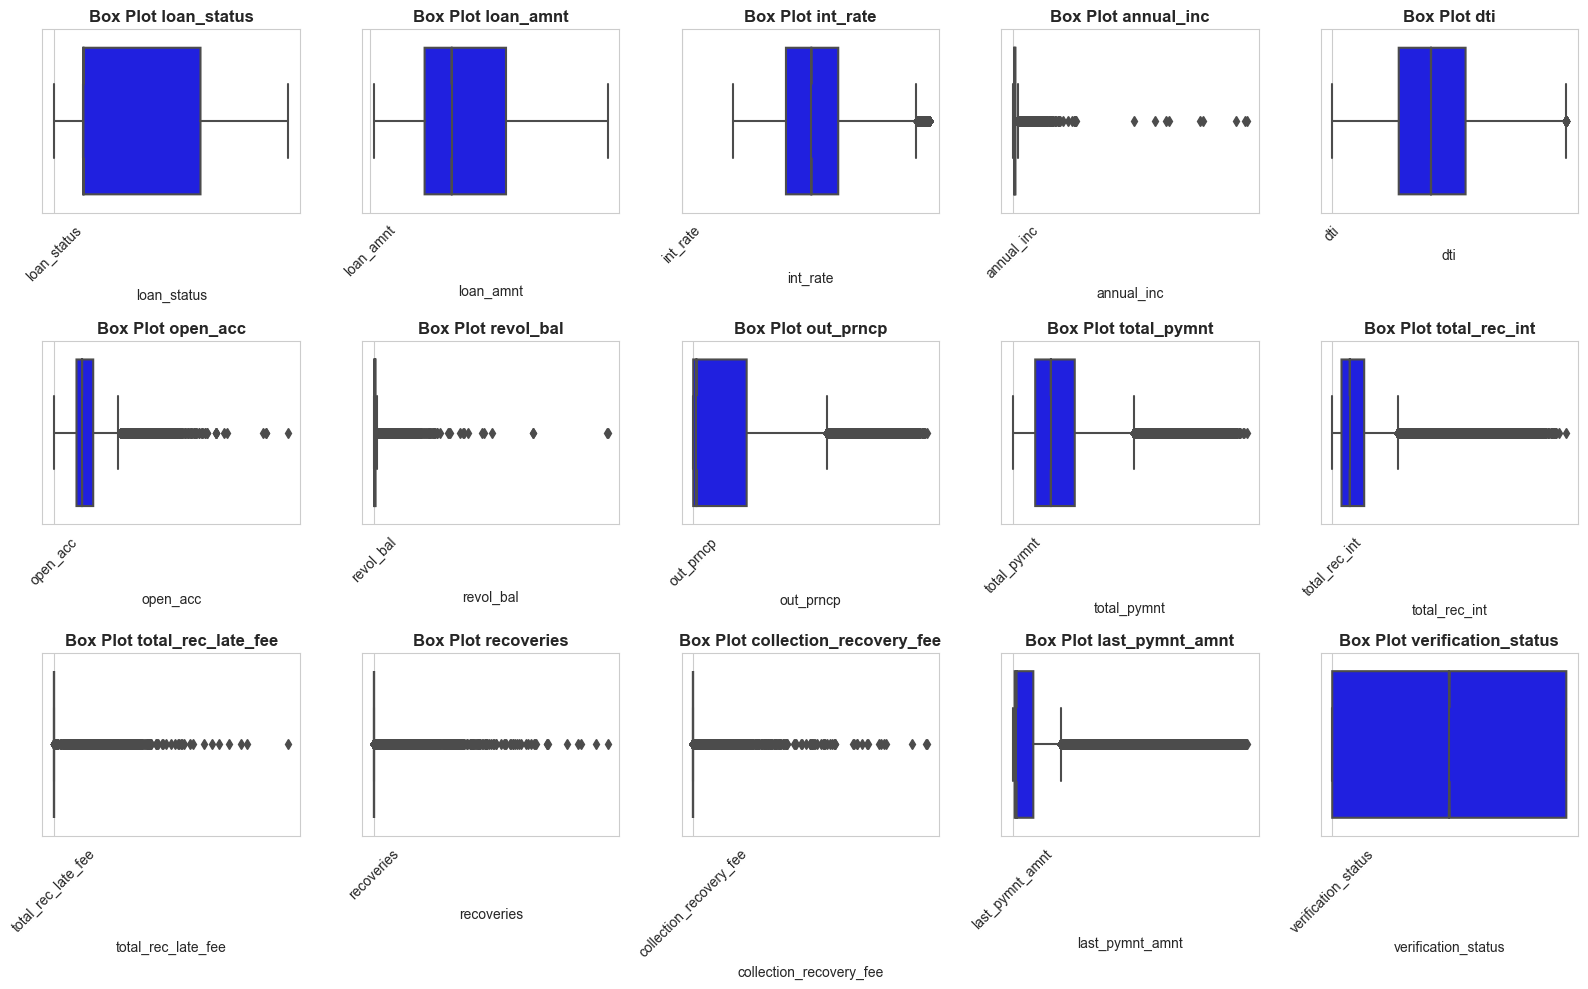

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
fig, axes = plt.subplots(3, 5, figsize=(16, 10))

columns_to_analyze = ['loan_status', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'verification_status']

for i, column in enumerate(columns_to_analyze):
    row = i // 5
    col = i % 5
    sns.boxplot(data=df1, x=column, ax=axes[row, col], color='blue', notch=True)
    
    # Menentukan posisi label
    positions = [0]
    labels = [column]
    axes[row, col].set_xticks(positions)
    axes[row, col].set_xticklabels(labels, rotation=45)
    
    axes[row, col].set_title(f'Box Plot {column}', fontdict={'fontweight':'bold', 'fontsize':12})

plt.tight_layout()
plt.show()


In [12]:
scaler = StandardScaler()
scaler.fit(df1)
scaled_features = scaler.transform(df1)
df1_scaled = pd.DataFrame(scaled_features,columns = df1.columns)
df1_scaled.head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,revol_bal,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,verification_status,loan_status
0,-1.124392,-0.729587,-0.896549,1.328632,-1.641544,-0.124888,-0.693944,-0.687137,-0.695548,-0.123464,-0.154549,-0.104824,-0.531492,1.164122,1.077960
1,-1.426088,0.330634,-0.787386,-2.065791,-1.641544,-0.703378,-0.693944,-1.274191,-0.867019,-0.123464,0.057470,-0.091840,-0.540846,-0.051674,-1.229824
2,-1.438156,0.488979,-1.110292,-1.082491,-1.842050,-0.642003,-0.693944,-1.032837,-0.799187,-0.123464,-0.154549,-0.104824,-0.445387,-1.267470,1.077960
3,-0.521001,-0.077850,-0.438061,0.354248,-0.238000,-0.514224,-0.693944,0.082948,-0.152728,3.099264,-0.154549,-0.104824,-0.498032,-0.051674,1.077960
4,-1.365749,-0.261438,0.122313,0.091865,0.764532,0.558748,-0.573268,-1.003980,-0.635962,-0.123464,-0.154549,-0.104824,-0.550184,-0.051674,-0.768267


In [13]:
columns = ['loan_amnt', 'int_rate','revol_bal','out_prncp','total_pymnt','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']
data = df1[columns]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
df1_scaled = pd.DataFrame(scaled_features,columns =data.columns)
df1_scaled=df1_scaled.join(df1_cat_encode)
df1_scaled.head()
df1_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466285 non-null  float64
 1   int_rate                 466285 non-null  float64
 2   revol_bal                466285 non-null  float64
 3   out_prncp                466285 non-null  float64
 4   total_pymnt              466285 non-null  float64
 5   total_rec_int            466285 non-null  float64
 6   total_rec_late_fee       466285 non-null  float64
 7   recoveries               466285 non-null  float64
 8   collection_recovery_fee  466285 non-null  float64
 9   last_pymnt_amnt          466285 non-null  float64
 10  verification_status      466285 non-null  int32  
 11  loan_status              466285 non-null  int32  
dtypes: float64(10), int32(2)
memory usage: 39.1 MB


In [14]:
from sklearn.linear_model import LogisticRegression
import warnings

#split dataset
y = df1_scaled["loan_status"]
x = df1_scaled.drop(['loan_status'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 88)

In [15]:
x_train

,loan_amnt,int_rate,revol_bal,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,verification_status
320962,-0.038288,0.266378,1.187925,0.590396,-0.398208,-0.071405,-0.123464,-0.154549,-0.104824,-0.475030,0
199183,1.289172,1.528546,0.628103,-0.693944,2.747061,2.680628,-0.123464,-0.154549,-0.104824,2.713130,1
187091,0.082390,1.129242,0.758591,-0.693944,-1.064964,-0.590725,-0.123464,-0.154549,-0.104824,-0.463742,2
50070,-1.076121,-0.068670,-0.554705,-0.396874,-0.841972,-0.611765,-0.123464,-0.154549,-0.104824,-0.529384,0
44227,0.927137,0.264083,0.431355,-0.693944,1.762510,0.612062,-0.123464,-0.154549,-0.104824,1.667291,2
...,...,...,...,...,...,...,...,...,...,...,...
90474,-0.792527,2.352397,-0.414737,-0.343123,-0.365280,0.165968,-0.123464,-0.154549,-0.104824,-0.507590,1
133553,-0.388255,0.114918,-0.453236,-0.693944,0.245902,-0.046488,-0.123464,-0.154549,-0.104824,0.029434,1
298959,0.444424,0.034598,-0.318008,1.099632,-0.280104,0.014121,-0.123464,-0.154549,-0.104824,-0.451666,0
104736,0.444424,2.219296,-0.504599,-0.693944,-0.032623,1.860850,-0.123464,-0.154549,-0.104824,-0.470103,1


In [16]:
x_test

,loan_amnt,int_rate,revol_bal,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,verification_status
156023,0.444424,0.564709,0.560779,-0.399305,1.141809,0.910784,-0.123464,-0.154549,-0.104824,-0.447997,2
378524,-1.208867,0.151635,-0.422282,-0.319229,-1.073951,-0.742214,-0.123464,-0.154549,-0.104824,-0.535746,0
209925,-1.293342,-0.165054,-0.168513,-0.693944,-0.867201,-0.731114,-0.123464,-0.154549,-0.104824,-0.540065,0
112115,0.565103,-1.789808,0.111955,-0.693944,-0.906493,-0.793833,-0.123464,-0.154549,-0.104824,-0.458282,1
341307,1.289172,1.643288,-0.152842,-0.693944,-0.659949,0.479185,-0.123464,-0.154549,-0.104824,-0.440654,1
...,...,...,...,...,...,...,...,...,...,...,...
298889,-1.124392,0.408659,-0.260599,-0.191285,-1.078956,-0.713339,-0.123464,-0.154549,-0.104824,-0.530914,2
100198,0.836629,1.920965,-0.485350,1.530538,0.600004,2.736989,-0.123464,-0.154549,-0.104824,-0.456293,2
115820,-1.365749,-0.178823,-0.652305,-0.693944,-0.984019,-0.878296,-0.123464,-0.154549,-0.104824,-0.203881,2
266936,1.147375,0.266378,0.800813,2.411670,-0.438806,0.497785,-0.123464,-0.154549,-0.104824,-0.460370,1


In [17]:
y_train

320962    1
199183    5
187091    0
50070     1
44227     5
         ..
90474     1
133553    5
298959    1
104736    0
387032    1
Name: loan_status, Length: 373028, dtype: int32

In [18]:
y_test

156023    1
378524    7
209925    5
112115    0
341307    0
         ..
298889    1
100198    1
115820    5
266936    1
53559     5
Name: loan_status, Length: 93257, dtype: int32

In [19]:
#logistic regression

warnings.filterwarnings('ignore')

logreg = LogisticRegression(random_state = 88)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=88)

In [20]:
y_predict = logreg.predict(x_test)
y_predict_train = logreg.predict(x_train)
y_predict1 = logreg.predict_proba(x_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#metode evaluasi

print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predict))

print('\naccuracy')
print(accuracy_score(y_test, y_predict))

print('\nclassification report')
print(classification_report(y_test, y_predict))


confustion matrix
[[ 8312     0     0     4     0   275     0     0     0]
 [    2 44447     0     0     0   342     3    16    46]
 [    0   178     0     0     0     1     0     0     1]
 [  150     0     0     1     1    15     0     0     0]
 [    6     0     0     0     5   409     0     0     0]
 [   99     0     0     0     9 36690     0     0     0]
 [    0   623     0     0     0     8     2     0     5]
 [    0   223     0     0     0     1     0     0     4]
 [    0  1330     0     0     0    11     1     0    37]]

accuracy
0.9596491416193959

classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8591
           1       0.95      0.99      0.97     44856
           2       0.00      0.00      0.00       180
           3       0.20      0.01      0.01       167
           4       0.33      0.01      0.02       420
           5       0.97      1.00      0.98     36798
           6       0.33      0.00   

Exploratory Data Analysis

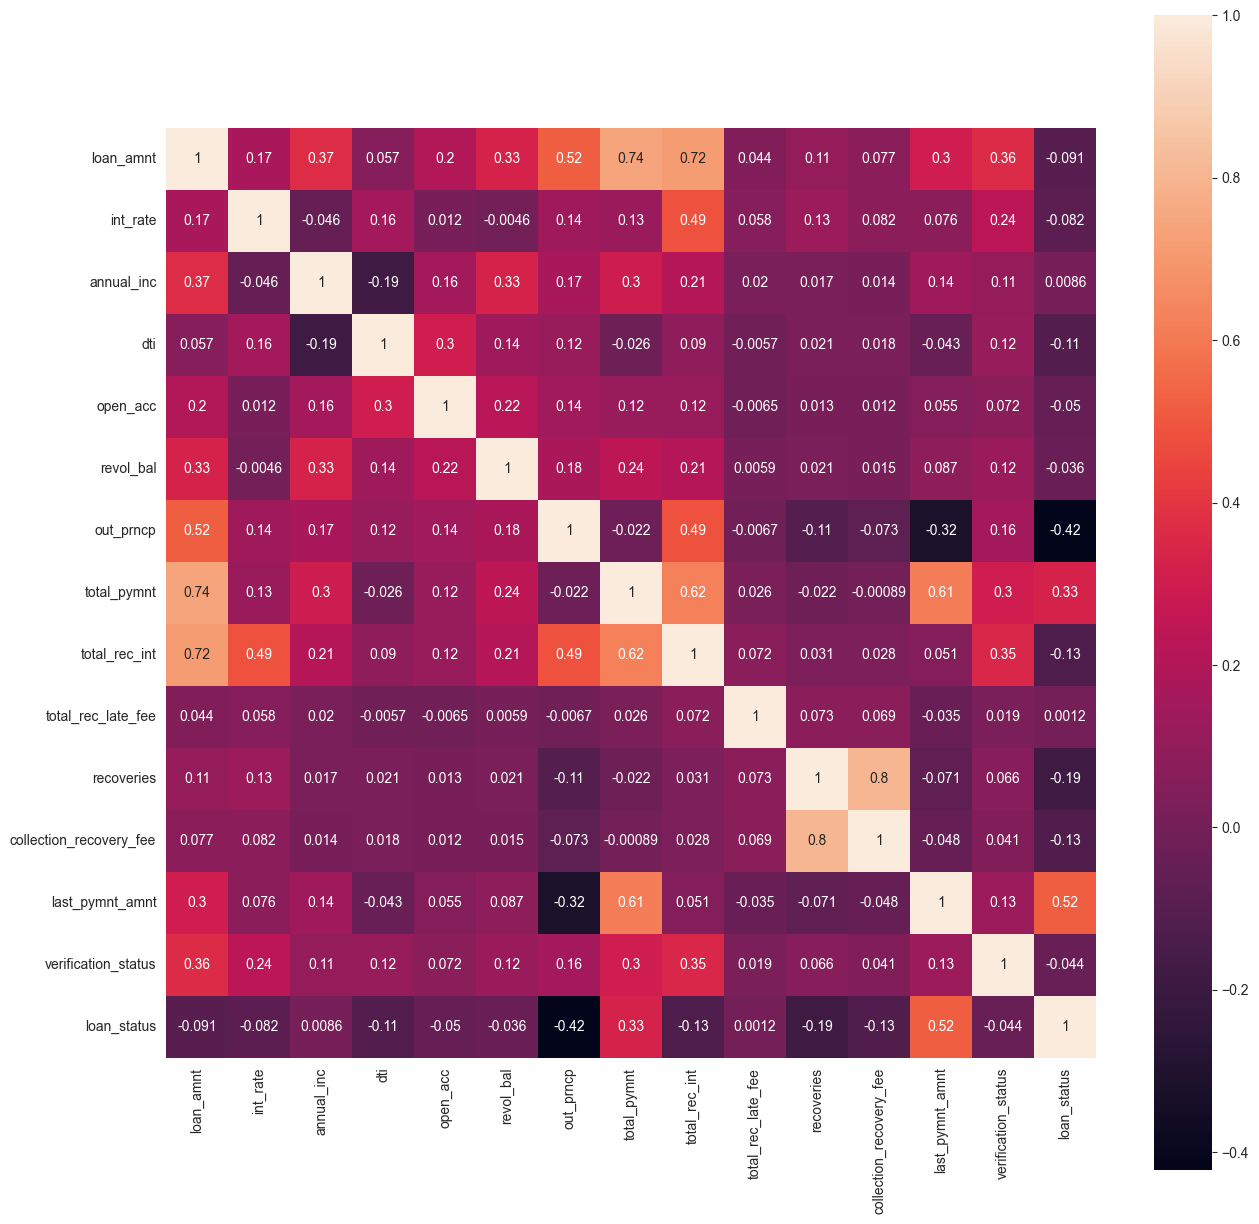

In [24]:
# Heatmap
fig = plt.figure(figsize=(15,15))
corr = df1.corr()
sns.heatmap(corr, annot=True, square=True,)
plt.yticks(rotation=0)

plt.show()

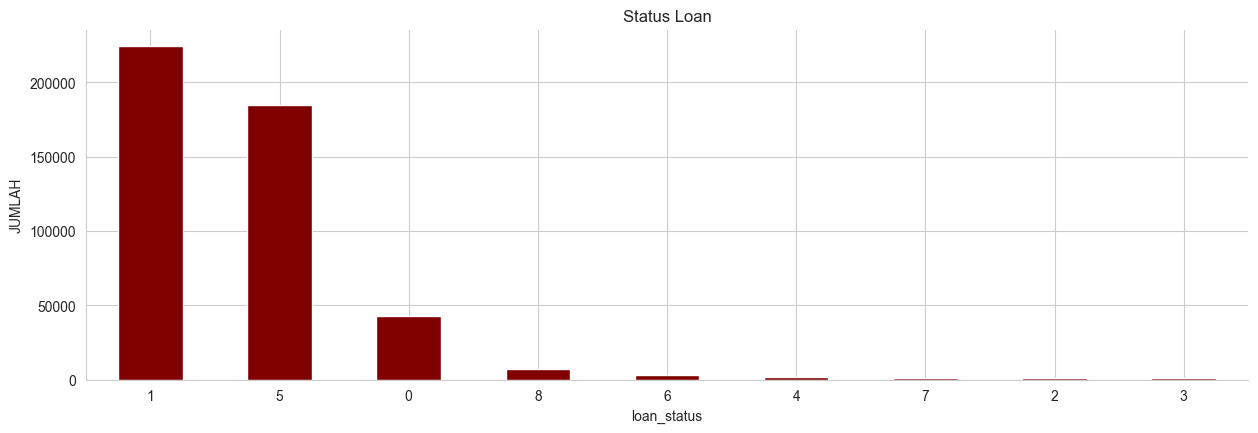

In [25]:
loan_status = df1['loan_status'].value_counts(sort=True)

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,3), (0,0), colspan=3)

#Grafik_1
loan_status.plot(ax=ax1, kind='bar', rot=0, color='maroon')
ax1.set_title('Status Loan')
ax1.set_ylabel('JUMLAH')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

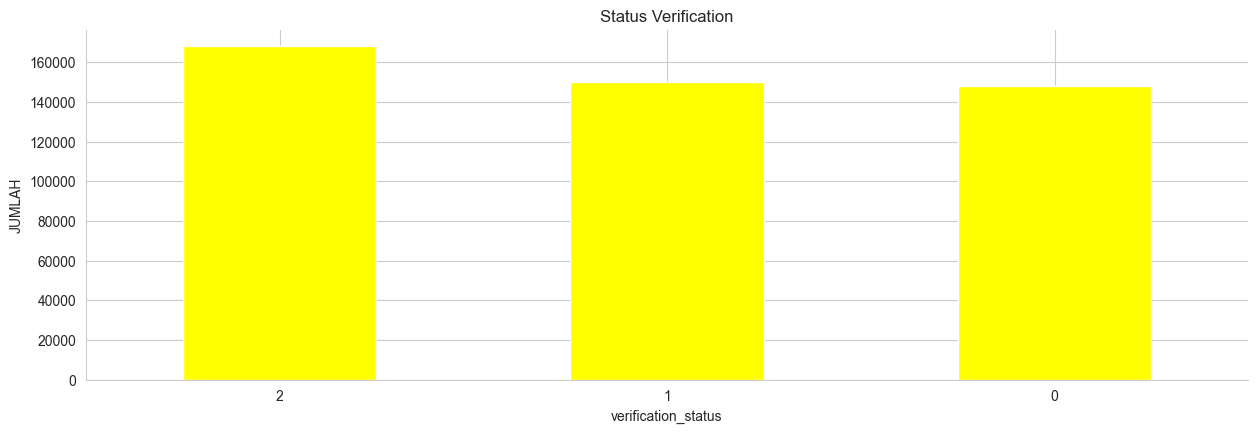

In [26]:
loan_status = df1['verification_status'].value_counts(sort=True)

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,3), (0,0), colspan=3)

#Grafik_1
loan_status.plot(ax=ax1, kind='bar', rot=0, color='yellow')
ax1.set_title('Status Verification')
ax1.set_ylabel('JUMLAH')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


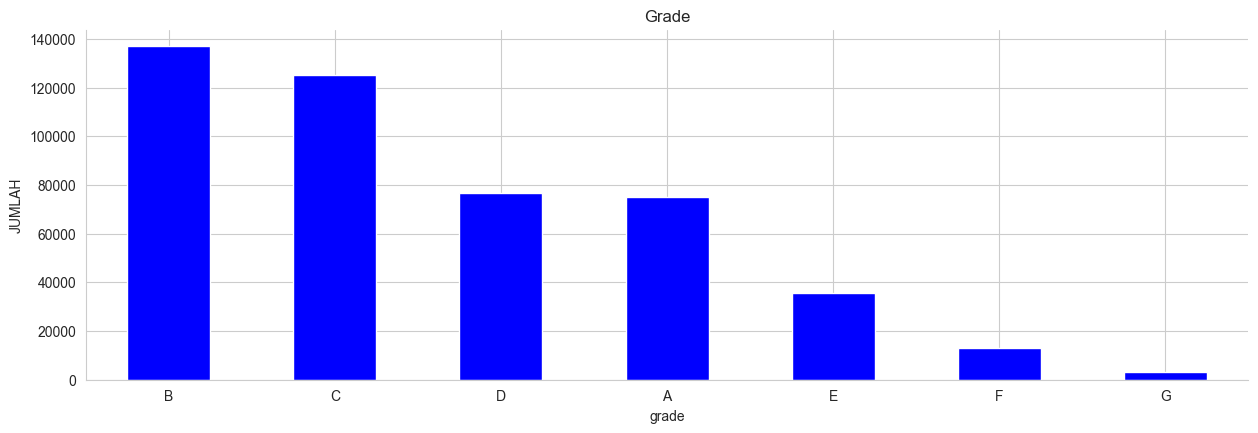

In [27]:
loan_status = df['grade'].value_counts(sort=True)

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,3), (0,0), colspan=3)

#Grafik_1
loan_status.plot(ax=ax1, kind='bar', rot=0, color='blue')
ax1.set_title('Grade')
ax1.set_ylabel('JUMLAH')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)